# >> DA 22 АД5 Проект 2 / Команда 1

Задача:

2019 год
Вы работаете аналитиками в крупной российской сети фастфуд-ресторанов, которая специализируется на блинах. Сейчас ваша компания планирует выйти на рынок США. Ваши коллеги подготовили список городов, которые приоритетны с точки зрения проверки рынка:

●	Columbus, Ohio; 

●	Cincinnati, Ohio; 

●	Cleveland, Ohio; 

●	Las Vegas, Nevada; 

●	Miami, Florida. 



Ваша задача: 
1.	Для каждого города из списка ответить, рекомендуете ли вы открывать там рестораны. 
2.	Если рекомендуете ― указать приоритетный порядок открытия, предполагаемое количество ресторанов и районы, в которых их нужно открывать. 
Вы будете презентовать свое решение потенциальным инвесторам из США 
на русском языке


## Загрузка данных

Импорт необходимых билиотек и подключение файла с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset1 = pd.read_csv('./Datafiniti_Fast_Food_Restaurants.csv')
dataset2 = pd.read_csv('./Datafiniti_Fast_Food_Restaurants_May19.csv')

df = pd.concat([dataset1, dataset2], ignore_index=True)
#df = pd.read_csv("./Datafiniti_Fast_Food_Restaurants_May19.csv")
df

id             dateAdded           dateUpdated  \
0      AVwcmSyZIN2L1WUfmxyw  2015-10-19T23:47:58Z  2018-06-26T03:00:14Z   
1      AVwcmSyZIN2L1WUfmxyw  2015-10-19T23:47:58Z  2018-06-26T03:00:14Z   
2      AVwcopQoByjofQCxgfVa  2016-03-29T05:06:36Z  2018-06-26T02:59:52Z   
3      AVweXN5RByjofQCxxilK  2017-01-03T07:46:11Z  2018-06-26T02:59:51Z   
4      AWQ6MUvo3-Khe5l_j3SG  2018-06-26T02:59:43Z  2018-06-26T02:59:43Z   
...                     ...                   ...                   ...   
19995  AVwd7U0T_7pvs4fz-fS_  2016-05-31T13:33:45Z  2018-12-03T09:04:19Z   
19996  AV1XW1fF3D1zeR_xFKHL  2017-07-18T20:19:50Z  2018-12-02T00:08:36Z   
19997  AV5UVbkiRxPSIh2RiQxV  2017-09-05T23:05:50Z  2018-12-01T07:38:03Z   
19998  AVwc9BxYByjofQCxj_GW  2016-03-31T02:43:12Z  2018-12-01T07:35:22Z   
19999  AVzA_GF53D1zeR_xBDVW  2017-06-19T15:33:04Z  2018-12-01T00:03:40Z   

                           address  \
0                 800 N Canal Blvd   
1                 800 N Canal Blvd   
2              206 Wears Valley Rd   
3                     3652 Parkway   
4             2118 Mt Zion Parkway   
...                            ...   
19995            1803 Carolina Ave   
19996  8511 Cantilever Way Ste 105   
19997               2601 Plover Rd   
19998                170 E Main St   
19999          3400 Westgate Drive   

                                              categories            city  \
0           American Restaurant and Fast Food Restaurant       Thibodaux   
1                                  Fast Food Restaurants       Thibodaux   
2                                   Fast Food Restaurant    Pigeon Forge   
3                                              Fast Food    Pigeon Forge   
4                                   Fast Food Restaurant          Morrow   
...                                                  ...             ...   
19995  American Restaurants,Caterers,Soul Food Restau...        Bessemer   
19996  Mexican Restaurants,Caterers,Delicatessens,Iri...         Raleigh   
19997  Carry-out food,Hot dog restaurants,Fast Food R...          Plover   
19998  Carry-out food,Caterers,Restaurant delivery se...  Hendersonville   
19999                   Fast Food Restaurant,Restaurants          Durham   

      country                                               keys   latitude  \
0          US           us/la/thibodaux/800ncanalblvd/1780593795  29.814697   
1          US           us/la/thibodaux/800ncanalblvd/1780593795  29.814697   
2          US      us/tn/pigeonforge/206wearsvalleyrd/-864103396  35.803788   
3          US             us/tn/pigeonforge/3652parkway/93075755  35.782339   
4          US          us/ga/morrow/2118mtzionparkway/1305117222  33.562738   
...       ...                                                ...        ...   
19995      US           us/al/bessemer/1803carolinaave/785498836  33.399574   
19996      US  us/nc/raleigh/8511cantileverwayste105/-1596320866  35.884500   
19997      US              us/wi/plover/2601ploverrd/-1161002137  44.453180   
19998      US          us/tn/hendersonville/170emainst/-66712705  36.308262   
19999      US         us/nc/durham/3400westgatedrive/-2061630068  35.965869   

       longitude                            name  postalCode province  \
0     -90.814742                  SONIC Drive In       70301       LA   
1     -90.814742                  SONIC Drive In       70301       LA   
2     -83.580553                       Taco Bell       37863       TN   
3     -83.551408                          Arby's       37863       TN   
4     -84.321143                  Steak 'n Shake       30260       GA   
...          ...                             ...         ...      ...   
19995 -86.951050  Church's Chicken Of Birmingham       35020       AL   
19996 -78.737541                      Luxury Box  27613-6996       NC   
19997 -89.543170                      McDonald's       54467       WI   
19998 -86.607339                       Pizza Hut       37075       TN   
19

In [3]:
len(np.unique(df['id']))

18964

## Удаление дублей

In [4]:
df = df.drop_duplicates(subset = 'id')

### Исправление названий

In [5]:
from datetime import datetime
from dateutil.parser import parse

In [6]:
# converting dateAdded and dateUpdated column data to datetime object

df['dateAdded'] = df['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
df['dateUpdated'] = df['dateUpdated'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

df.loc[df['name'] == 'McDonalds', 'name'] = "McDonald's"
df.loc[df['name'] == 'SUBWAY', 'name'] = "Subway"

In [7]:
df.loc[df['postalCode'] == '45219-1309', 'postalCode'] = '45219'
df.loc[df['postalCode'] == '97239-1937', 'postalCode'] = '97239' 

In [8]:
remove_hyphen = df[df['postalCode'].str.contains('-')]['postalCode'].str[:-5]

for i in remove_hyphen.index:
    df['postalCode'][i] == remove_hyphen[i]

### Карта расположения фастфуд ресторанов в США

In [9]:
import plotly.express as px
fig = px.density_mapbox(df, lat='latitude', lon='longitude', hover_name = 'name', radius=10,
                        center=dict(lat=40.4173, lon=-82.9071), zoom=3,
                        mapbox_style="stamen-terrain")
fig.show()

### Наиболее популярные сети фастфуд ресторанов в США

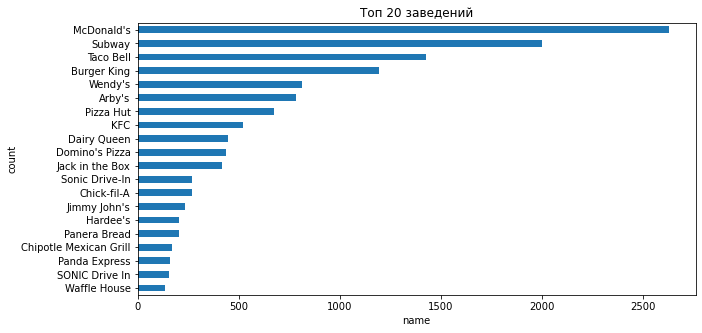

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
nameplot=df['name'].value_counts()[:20].plot.barh(title='Топ 20 заведений')
nameplot.set_xlabel('name',size=10)
nameplot.set_ylabel('count',size=10)
ax.invert_yaxis()
plt.show()

## Расчет плотности фастфуд ресторанов по городам США

Подключение внешних данных о населении городов США, получение оценки плотности фастфуд ресторанов (количество заведений / 10 тыс. населения)

In [11]:
df_population = pd.read_csv('./uscities.csv')
df_population_cities = df_population['city'].values
df_population_cities = np.sort(df_population_cities)

df_cities = np.unique(df['city'])
df_zips = np.unique(df['postalCode'])

dpop = []

# for i in df_cities:
#         d.append({
#             'city': i,
#             'state_id': df[(df['city'] == i)]['province']
#         })

# fastfood_density = pd.DataFrame()

for i in df_population.index:
    city = df_population['city'][i]
    state = df_population['state_id'][i]
    population = df_population['population'][i]
    dpop.append({
        'city': f'{city}, {state}',
        'population': population,
        'population10k': population/10000
    })

ddf = []

for i in df.index:
    city = df['city'][i]
    state = df['province'][i]
    outlets = df[df['city'] == city]['id'].count()
    ddf.append({
        'city': f'{city}, {state}',
        'outlets': outlets
    })



# for i in cities:
#      np.append(population, df_population[df_population['city'] == i]['population'].values)

In [12]:
df_pop = pd.DataFrame(dpop)

In [13]:
df_df = pd.DataFrame(ddf)

In [14]:
merged_df = pd.merge(df_df, df_pop, on = "city")
merged_df = pd.DataFrame(merged_df)
merged_df = merged_df.drop_duplicates(ignore_index = True)

outlets_density = []

for i in merged_df.index:
    outlets_density.append(
        merged_df['outlets'][i] / (merged_df['population'][i] / 10000)
    )

merged_df['outlets_density'] = outlets_density

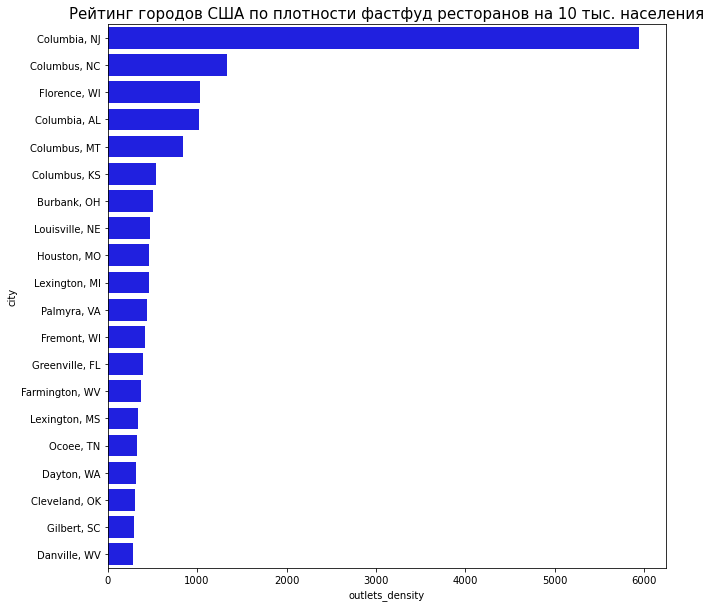

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data = merged_df[['city', 'outlets_density']].sort_values('outlets_density', ascending= False).head(20), x = 'outlets_density', y = 'city', color="b")
plt.title('Рейтинг городов США по плотности фастфуд ресторанов на 10 тыс. населения', size= 15)
#ax = sns.barplot(data = merged_df[['city', 'population']].sort_values('population', ascending= False).head(20), x = 'population', y = 'city', color="b")

plt.show()

## Плотность фастфуд-ресторанов в рассматриваемых городах

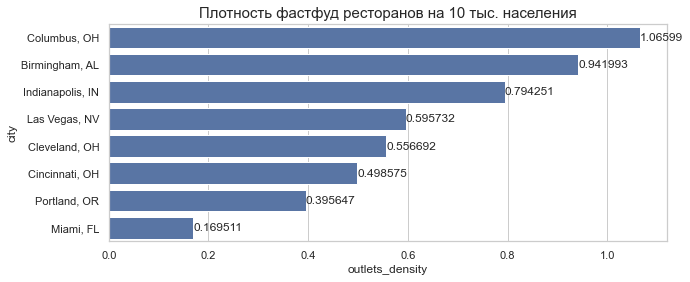

In [16]:
cities_list = ['Columbus, OH', 'Cincinnati, OH', 'Cleveland, OH', 'Las Vegas, NV', 'Miami, FL', 'Indianapolis, IN', 'Birmingham, AL', 'Portland, OR']
cities_alone = ['Columbus', 'Cincinnati', 'Cleveland', 'Las Vegas', 'Miami']
states_alone = ['OH', 'OH', 'OH', 'NV', 'FL']
required_cities = merged_df['city'].isin(['Columbus, OH', 'Cincinnati, OH', 'Cleveland, OH', 'Las Vegas, NV', 'Miami, FL', 'Indianapolis, IN', 'Birmingham, AL', 'Portland, OR'])
req_df = merged_df[required_cities]

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = req_df.sort_values('outlets_density', ascending=False), x = 'outlets_density', y = 'city', color='b')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Плотность фастфуд ресторанов на 10 тыс. населения", size=15)
plt.show()

In [17]:
req_df.sort_values('outlets_density', ascending=False).to_csv('./generated_csv/density.csv')

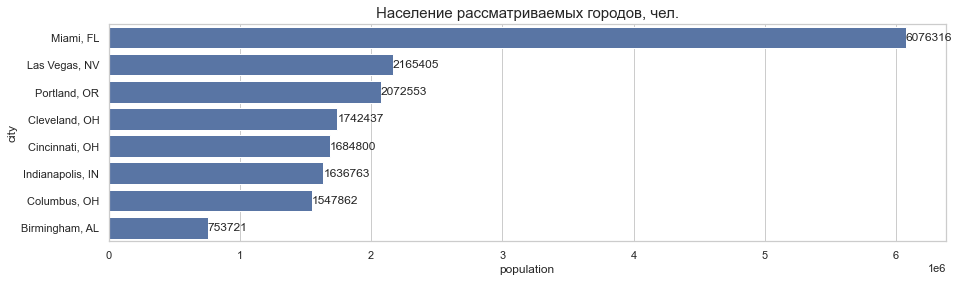

In [18]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = req_df.sort_values('population', ascending=False), x = 'population', y = 'city', color='b')
for i in ax.containers:
    ax.bar_label(i, fmt = '%.0f')

plt.title("Население рассматриваемых городов, чел.", size=15)
plt.show()

### Функции для анализа города

Программа отображает карту расположения заведений. Цвет маркера соответствует району (индексу), в котором расположен ресторан. 
Затем высчитывается количество фастфуд ресторанов в каждом из районов. 
После определяется плотность фастфуд ресторанов на 10 тыс. населения района (также отображается диаграмма с населением районов)
Определяются наиболее популярные сети фастфуд в городе.

In [19]:
def map_show(city, state):
    city_df = df[(df['city'] == city) & (df['province'] == state)]
    # fig = px.density_mapbox(city_df, lat='latitude', lon='longitude', z = 'postalCode', hover_name = 'name', radius=10,
    #                         center=dict(lat=39.9612, lon=-82.9988), zoom=10,
    #                         mapbox_style="stamen-terrain", range_color = [0,1], opacity = 0.5)
    # fig.show()
    fig = px.scatter_mapbox(city_df, lat="latitude", lon="longitude", color="postalCode", hover_name="name",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, width=1200, height=600, title= f"Карта расположения фастфуд ресторанов в {city}, {state}")
    fig.update_layout(mapbox_style = 'stamen-terrain')
    fig.show()
    fig.write_html(f'./generated_csv/{city}_map.html')


def rest_quantity(city, state):
    city_df = df[(df['city'] == city) & (df['province'] == state)]
    pd_data = city_df['postalCode'].value_counts().rename_axis('zip').reset_index(name = 'quantity')
    city_zip_density = pd.DataFrame(pd_data)

    fig, ax  = plt.subplots(figsize = (10,5))
    sns.barplot(data = city_zip_density, x = 'quantity', y = 'zip', color = 'b')

    plt.title(f'Количество фастфуд ресторанов по районам {city}, {state}', size = 15)

    for i in ax.containers:
        ax.bar_label(i, fmt = '%g')

    plt.show()

def rest_density(city, state):
    city_df = df[(df['city'] == city) & (df['province'] == state)]
    pd_data = city_df['postalCode'].value_counts().rename_axis('zip').reset_index(name = 'quantity')
    city_zip_density = pd.DataFrame(pd_data)
    zip_population = pd.read_csv('./uszips.csv')
    dpop = []

    for i in city_zip_density.index:
        zip = city_zip_density['zip'][i]
        quantity = city_zip_density['quantity'][i]
        index = int(np.where(zip_population['zip'] == int(zip))[0][0])
        population = zip_population['population'][index]
        density = quantity / (population / 10000)
        dpop.append({
            'zip': zip,
            'population': population,
            'density': density
        })
    
    city_zip_density = pd.DataFrame(dpop)
    city_zip_density = city_zip_density.sort_values(by = 'density', ascending = False)

    fig, ax  = plt.subplots(figsize = (10,7))
    sns.barplot(data = city_zip_density, x = 'density', y = 'zip', color = 'b')
    plt.title(f'Плотность фастфуд ресторанов по районам {city}, {state}', size = 15)
    for i in ax.containers:
        ax.bar_label(i, fmt = '%g')
    plt.show()

    city_zip_density.to_csv(f'./generated_csv/{city}_{state}_zipdensity.csv')

    city_zip_density = city_zip_density.sort_values(by = 'population', ascending = False)

    fig, ax  = plt.subplots(figsize = (10,7))
    sns.barplot(data = city_zip_density, x = 'population', y = 'zip', color = 'b')
    for i in ax.containers:
        ax.bar_label(i, fmt = '%g')
    plt.title(f'Население по районам {city}, {state}', size = 15)
    plt.show

    city_zip_density.to_csv(f'./generated_csv/{city}_{state}_zippop.csv')

    pd_data = city_df['name'].value_counts().rename_axis('branch').reset_index(name = 'quantity')
    city_branches = pd.DataFrame(pd_data)

    fig, ax  = plt.subplots(figsize = (10,15))
    sns.barplot(data = city_branches, x = 'quantity', y = 'branch', color = 'b')
    for i in ax.containers:
        ax.bar_label(i, fmt = '%g')
    plt.title(f'Рейтинг брендов {city}, {state}', size = 15)
    plt.show

    city_branches.to_csv(f'./generated_csv/{city}_{state}_branches.csv')

def city_analysis(city, state):
    map_show(city, state)
    rest_quantity(city, state)
    rest_density(city, state)


На основе полученных данных в городах определялись оптимальные районы для открытия новых точек. Учитывались районы с наибольшим населением и плотностью фастфуд-ресторанов выше средней

# Cleveland, OH

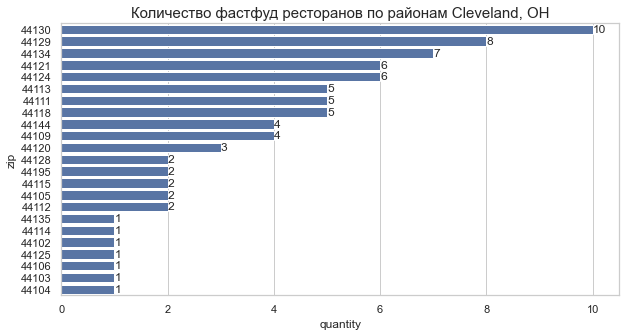

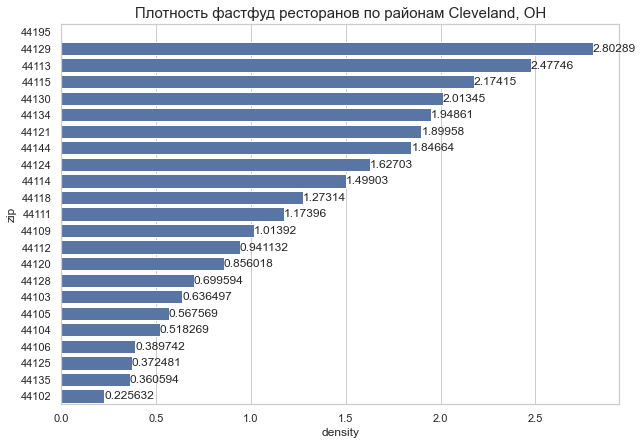

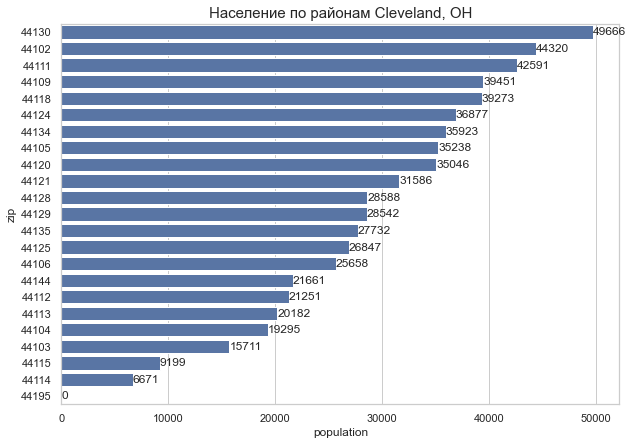

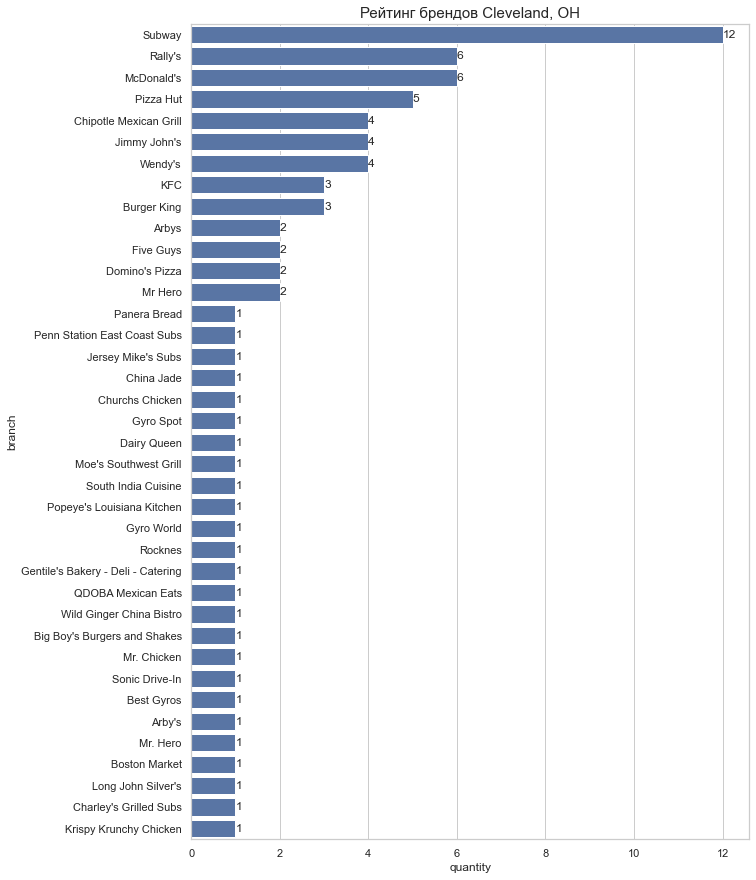

In [20]:
city_analysis('Cleveland', 'OH')

# Cincinnati OH

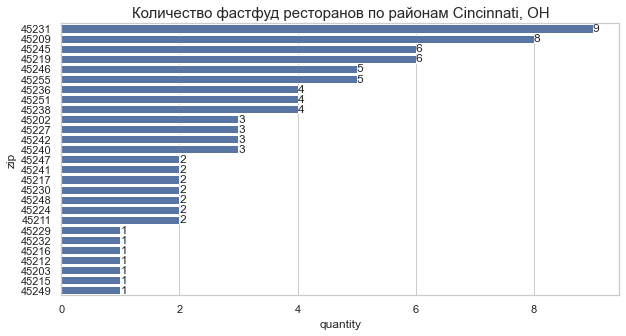

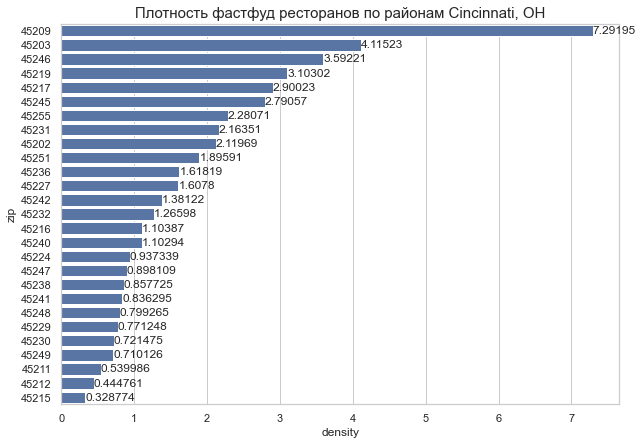

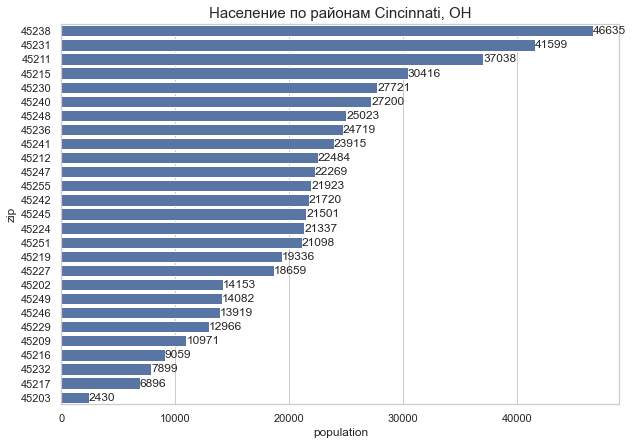

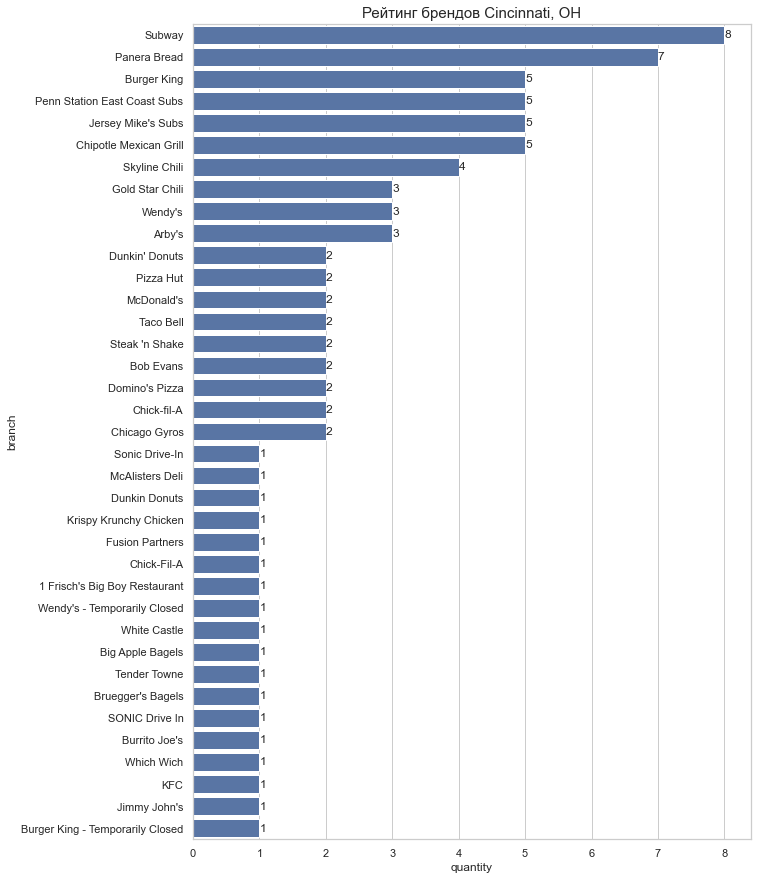

In [21]:
city_analysis('Cincinnati', 'OH')

# Portland, OR

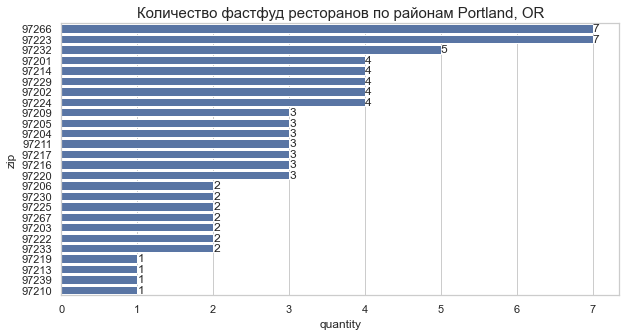

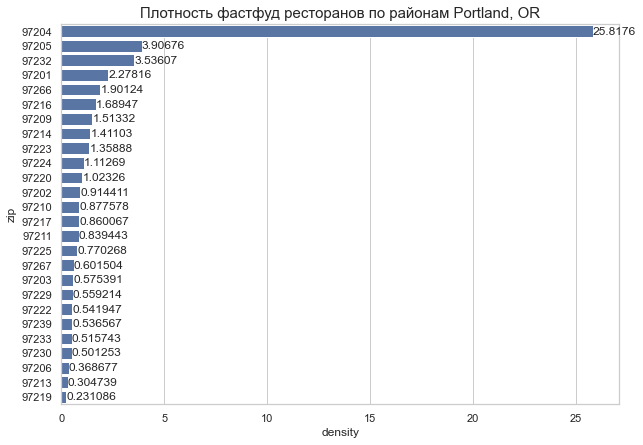

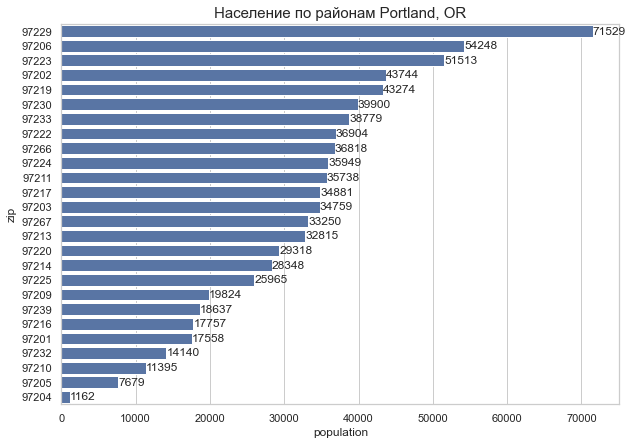

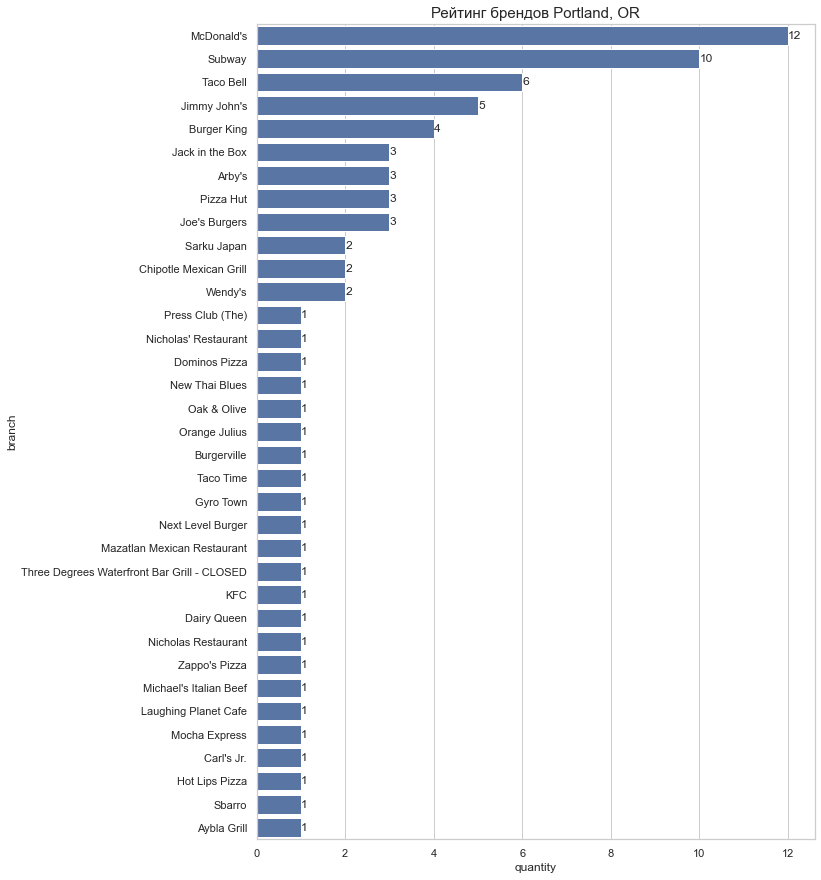

In [22]:
city_analysis('Portland', 'OR')

# Columbus, OH

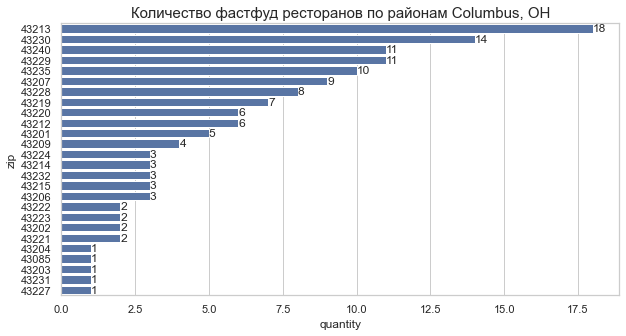

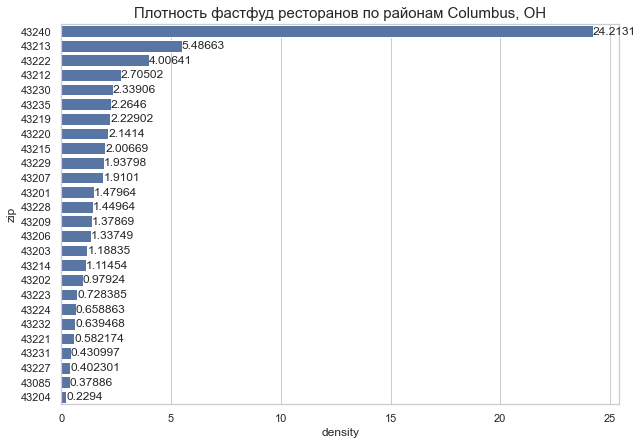

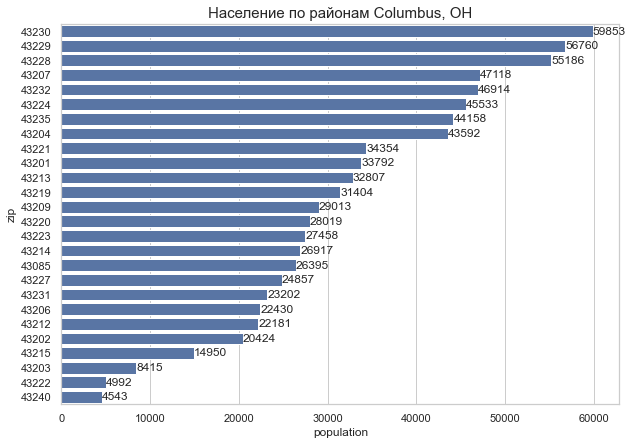

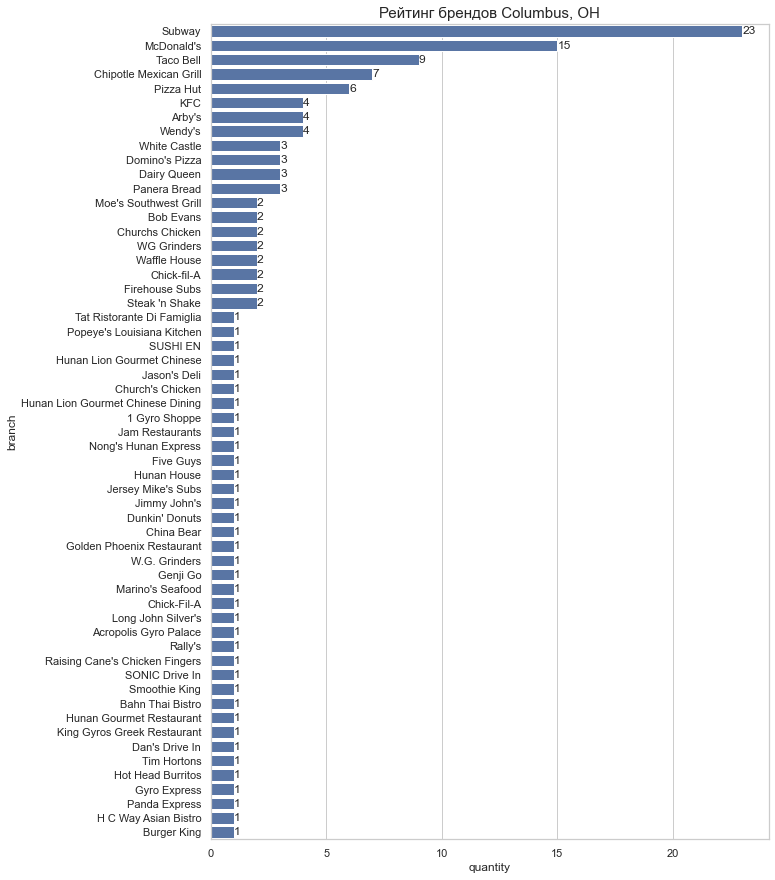

In [23]:
city_analysis('Columbus', 'OH')

# Birmingham, AL

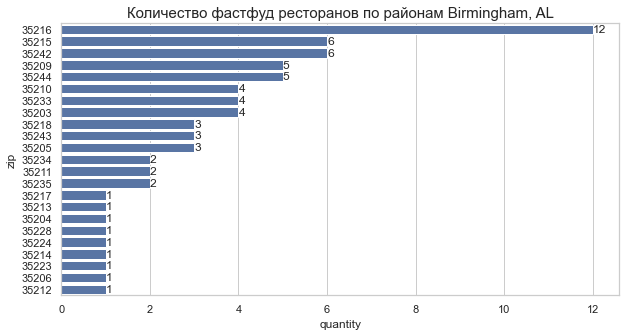

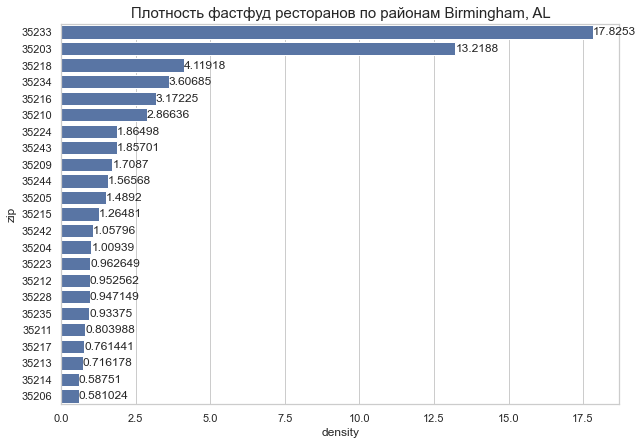

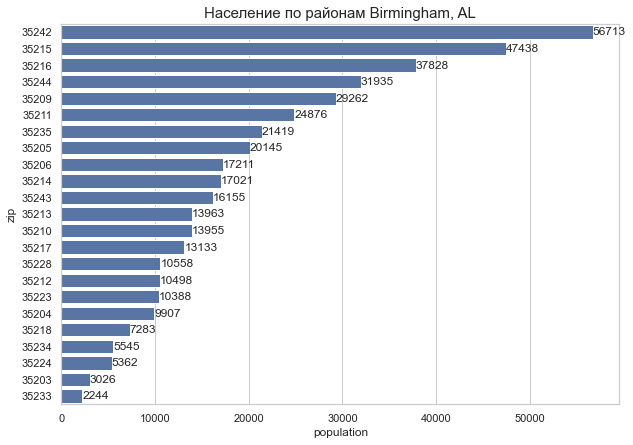

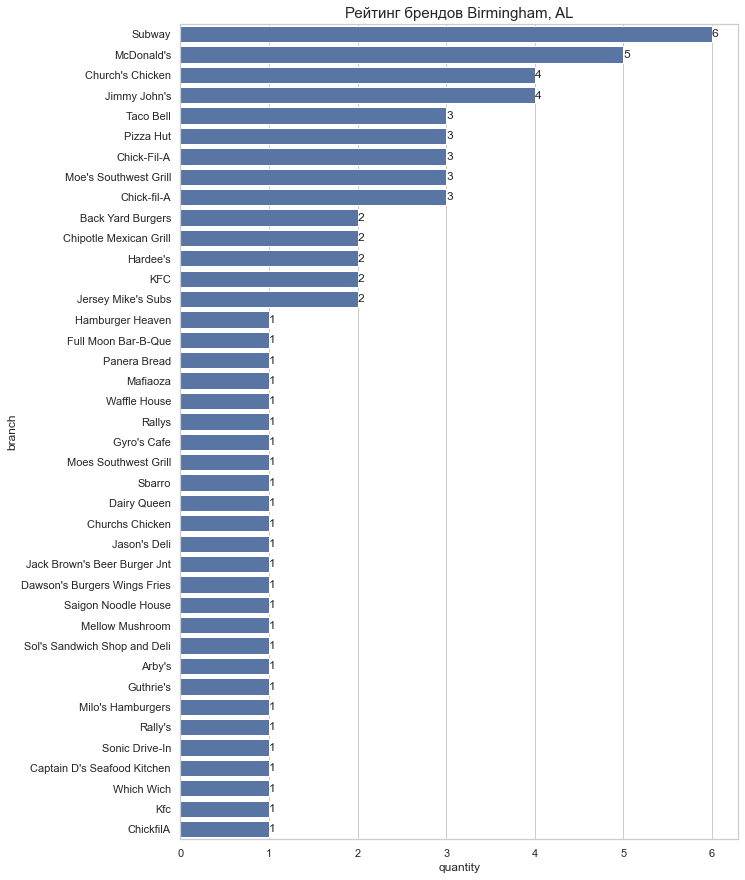

In [24]:
city_analysis('Birmingham', 'AL')

# Indianapolis, IN

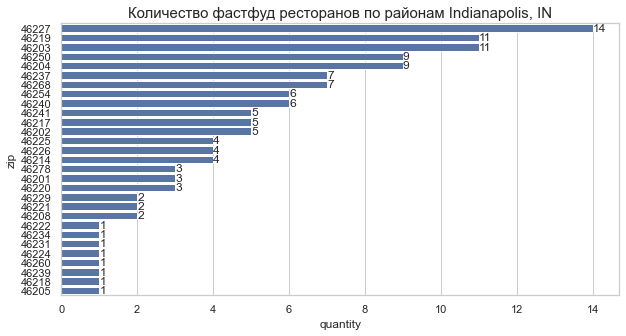

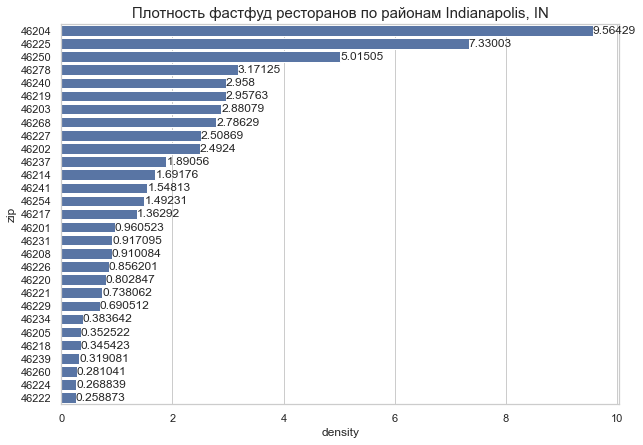

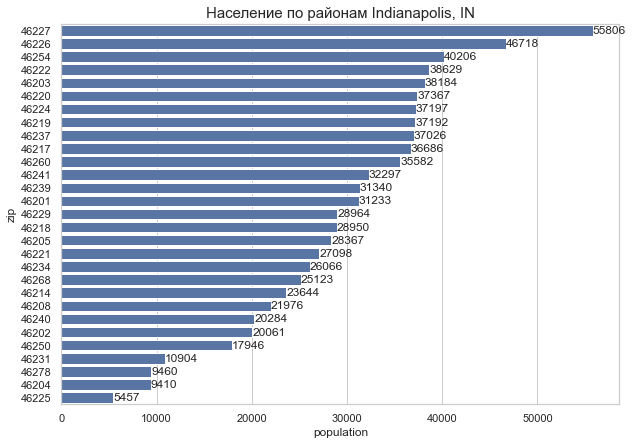

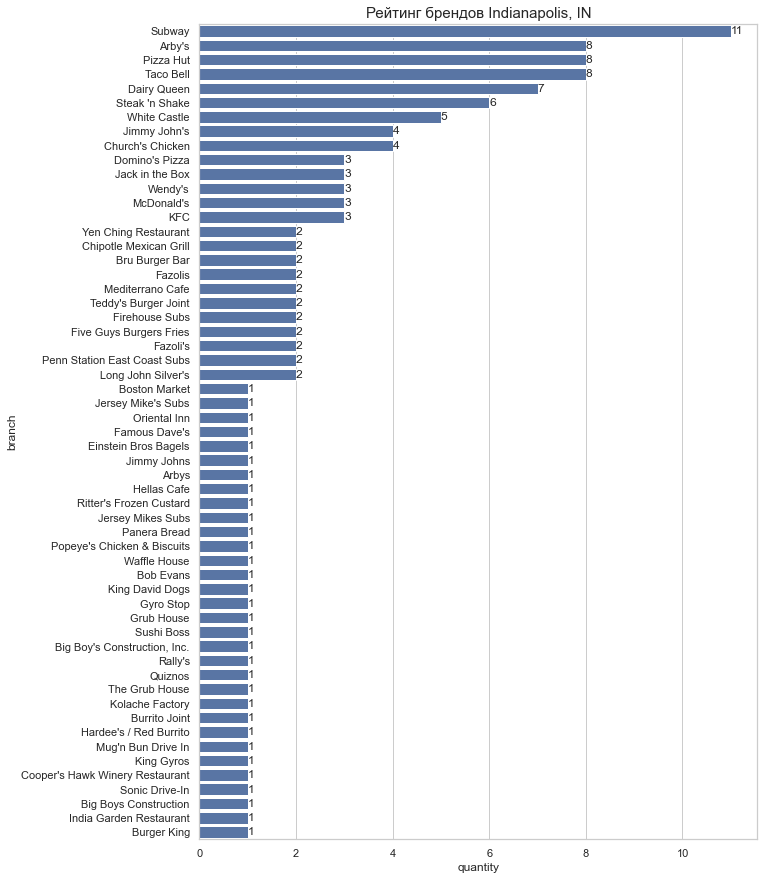

In [25]:
city_analysis('Indianapolis', 'IN')

# Las Vegas, NV

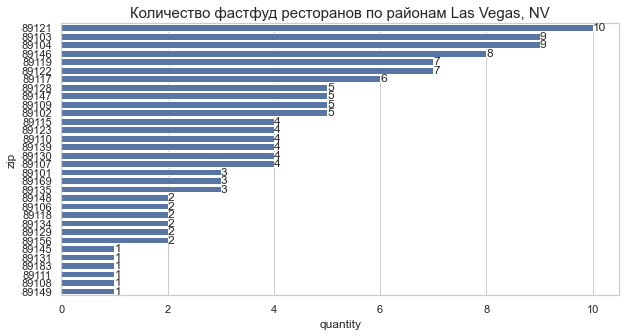

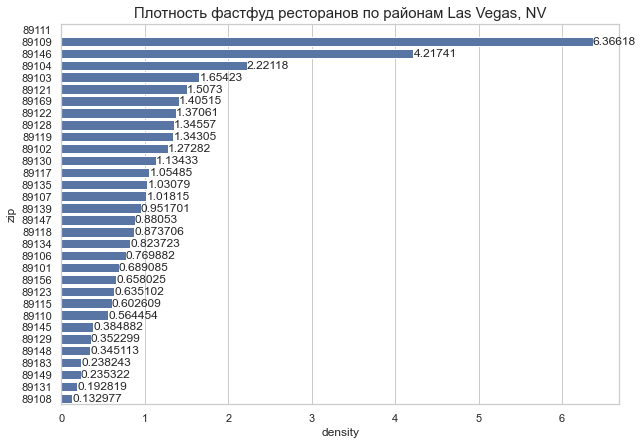

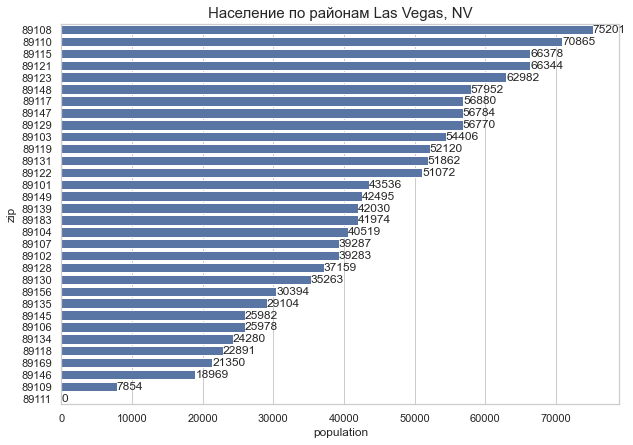

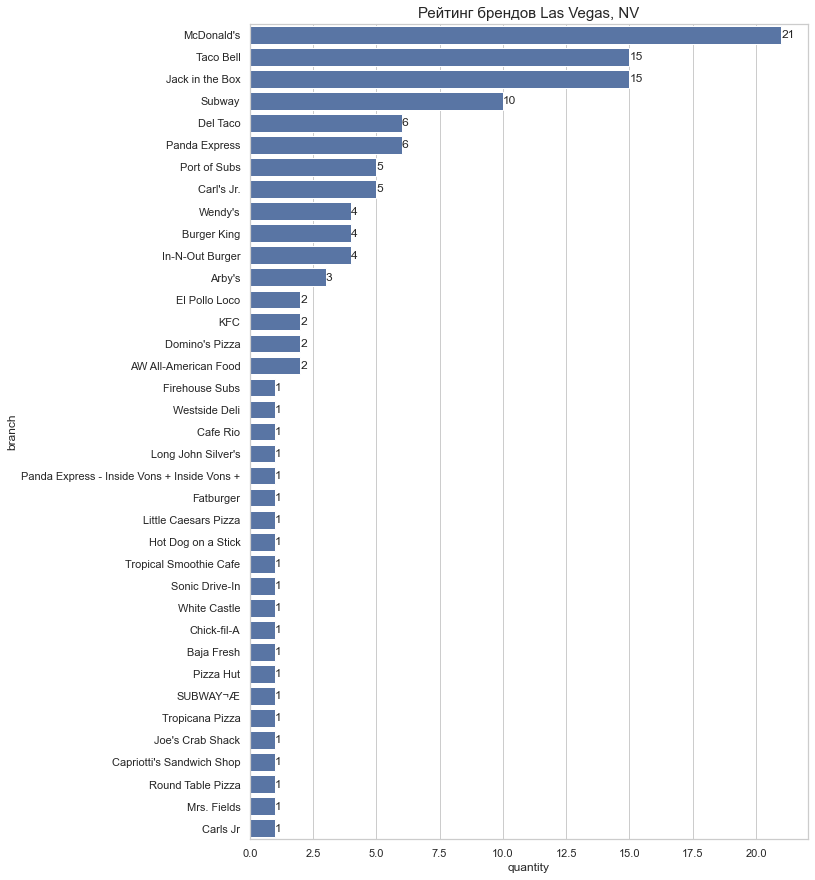

In [26]:
city_analysis('Las Vegas', 'NV')

# Miami, FL

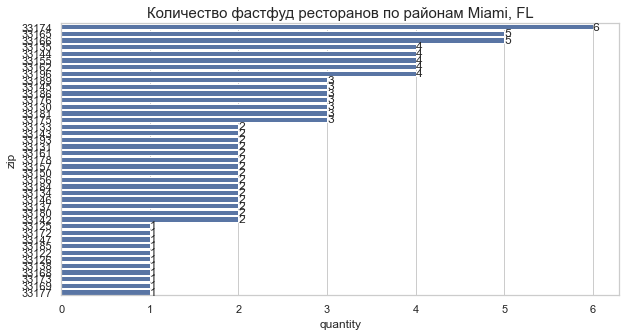

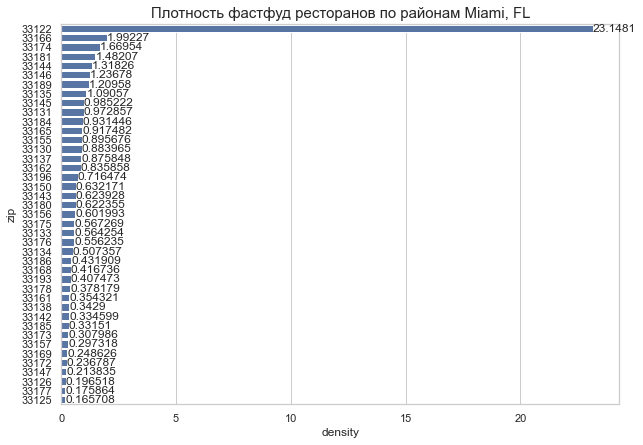

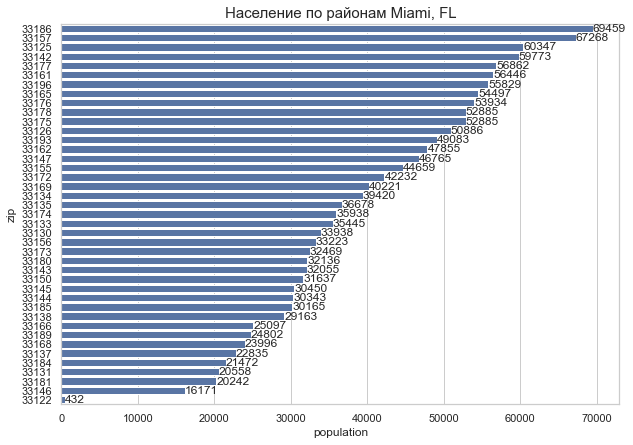

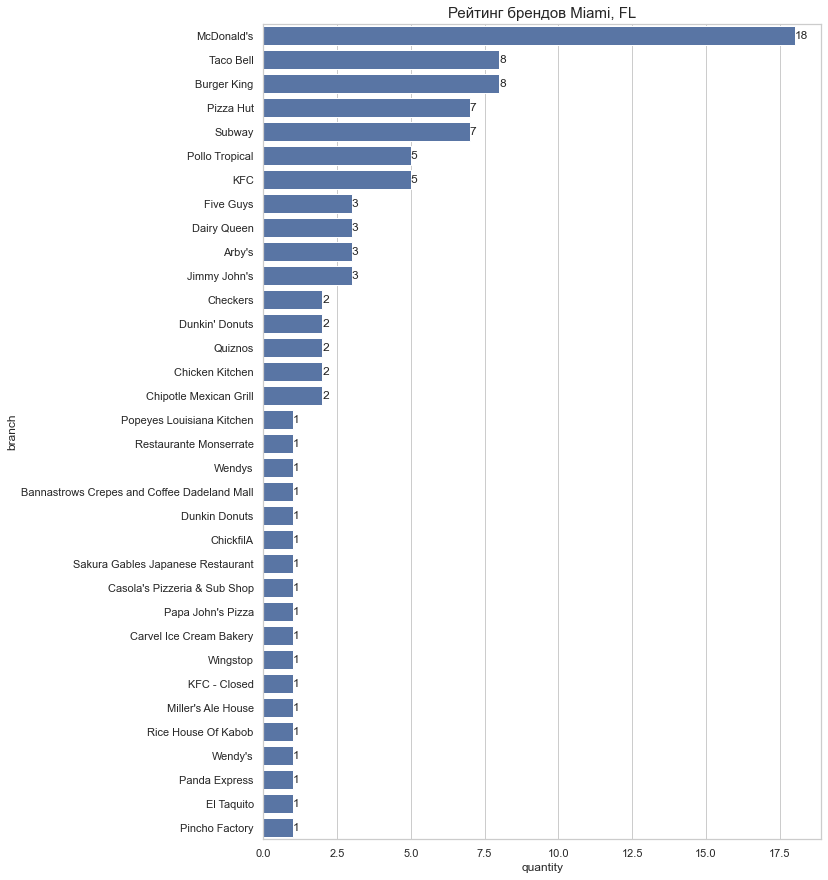

In [27]:
city_analysis('Miami', 'FL')